In [4]:
import utils
import numpy as np
import pandas as pd
dict_preds = utils.load_pickle("/Users/karanthakkar/Downloads/DTU_test_metric_model_2023-11-05_10:03:55_300.pkl")

In [5]:
def combine_keys_by_suffix(dictionary):
    combined_dict = {}
    
    for key, values in dictionary.items():
        # Split the key and take the part after the underscore
        suffix = key.split("_")[1]
        
        # If the suffix is not in the combined dictionary, initialize a new list
        if suffix not in combined_dict:
            combined_dict[suffix] = []
        
        # Append the current list of values to the list under the suffix key
        combined_dict[suffix].extend(values)
        
    return combined_dict

combined_dict = combine_keys_by_suffix(dict_preds)
tf_preds = utils.load_pickle("evaluation_datasets/DTU_subj_scores_tf.pkl")


In [6]:
## get the mean of each values in the keys and replace the values with the mean
for key, values in combined_dict.items():
    combined_dict[key] = np.mean(values)

for key, values in tf_preds.items():
    tf_preds[key] = np.mean(values)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example dictionaries where each key maps to a list of values
dict1 = combined_dict #{'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]}
dict2 = tf_preds #{'d': [10, 11, 12], 'e': [13, 14, 15], 'f': [16, 17, 18]}

# Concatenate the lists within each dictionary
values1 = [item for item in dict1.values()]
values2 = [item for item in dict2.values()]

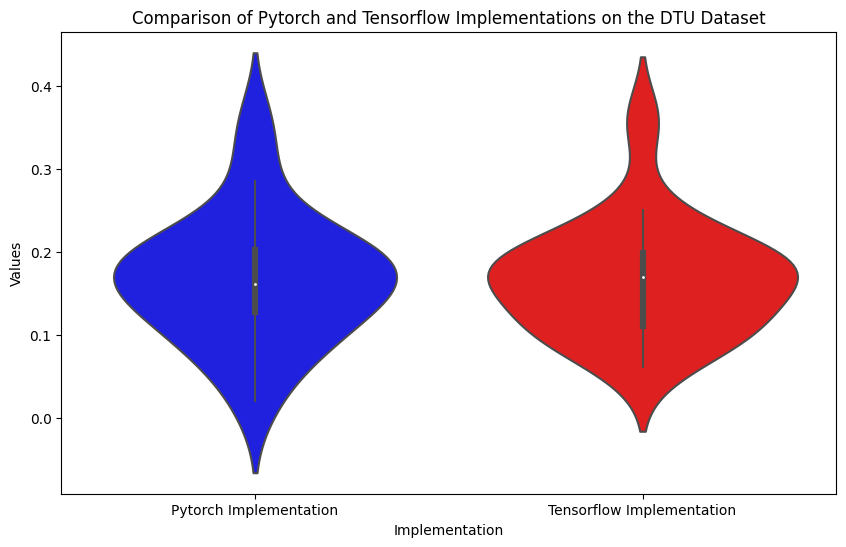

Mean of Pytorch Implementation: 0.16695746779441833
Mean of Tensorflow Implementation: 0.1663713358997052


In [8]:
# Combine values into a single DataFrame
df = pd.DataFrame({
    'Values': np.concatenate([values1, values2]),
    'Implementation': ['Pytorch'] * len(values1) + ['Tensorflow'] * len(values2)
})
plt.figure(figsize=(10, 6))

# Plot the violin plots
sns.violinplot(x='Implementation', y='Values', data=df, palette=['blue', 'red'], alpha=0.5)
plt.xlabel('Implementation')
plt.xticks([0, 1], ['Pytorch Implementation', 'Tensorflow Implementation'])  # Custom x-tick labels

plt.title('Comparison of Pytorch and Tensorflow Implementations on the DTU Dataset')
plt.show()

print("Mean of Pytorch Implementation: {}".format(np.mean(values1)))
print("Mean of Tensorflow Implementation: {}".format(np.mean(values2)))